## Parte 1

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from pylab import rcParams
import csv
from random import random

%matplotlib inline
rcParams['figure.figsize'] = (10,10)

In [34]:
with open("../Ejercicio2/Anillo.txt") as anillo:
    reader = csv.reader(anillo, delimiter = "\t")
    coord_anillo = list(zip(*reader))

#Convertimos datos a flotantes
anilloX = list(map(float, coord_anillo[0]))
anilloY = list(map(float, coord_anillo[1]))

Consideremos dos puntos $P_1 = (x_1, y_1)$ y $P_2 = (x_2, y_2)$, la distancia $d$ entre ellos esta dada por:

$$d^2 = (x_2 - x_1)^2 + (y_2 - y_1)^2$$

Como la velocidad es proporcional a la distancia, tenemos que la magnitud de la velocidad radial $v$ es:

$$v = 0.1 d$$

Además también se cumple que:

$$v^2 = v_x^2 + v_y^2 = (0.1)^2d^2$$

Sustituyendo $d^2$ en esta última ecuación llegamos a:

$$v^2 = (0.1)^2(x_2 - x_1)^2 + (0.1)^2(y_2 - y_1)^2$$

Por lo que podriamos decir que:

$$v_x = 0.1(x_2 - x_1)$$

$$v_y = 0.1(y_2 - y_1)$$

Estas velocidades van de $P_1$ a $P_2$

In [35]:
lado = 1000
dist_min = 101
vy = 0
vel = [0 for i in range(len(anilloX))]
for i in range(len(anilloX)):
    #Puntos pivote
    x1 = anilloX[i]
    y1 = anilloY[i]
    for j in range(len(anilloX)):
        #Si es el mismo punto lo descartamos
        if i == j:
            continue
            
        #Seleccionamos otro punto
        x2 = anilloX[j]
        y2 = anilloY[j]
        
        #Si estan fuera de un circulo de radio lado/10 lo descartamos
        if (x2 - x1)**2 + (y2 - y1)**2 > (lado/10)**2:
            continue
            
        #Si la distancia entre esos dos puntos es menor a dist_min, asignamos ese valor a dist_min
        if (x2 - x1)**2 + (y2 - y1)**2 < dist_min**2:
            dist_min = np.sqrt((x2 - x1)**2 + (y2 - y1)**2)
            vy = 0.1 * (y2 - y1) #Asignamos la velocidad vertical correspondiente a esa distancia
            
    vel[i] = vy #Asignamos la velocidad para la distancia minima al elemento i-esimo del array
    dist_min = 101 #reseteamos la distancia
        

In [36]:
anilloY = np.sum([anilloY, vel], axis = 0) #Sumamos la velocidad a la coordenada Y de los puntos

In [38]:
#Guardamos las nuevas coordenadas en otro archivo
with open("anillo_redshift.txt", "w") as ars:
    writer = csv.writer(ars, delimiter = '\t')
    writer.writerows(zip(anilloX,anilloY))

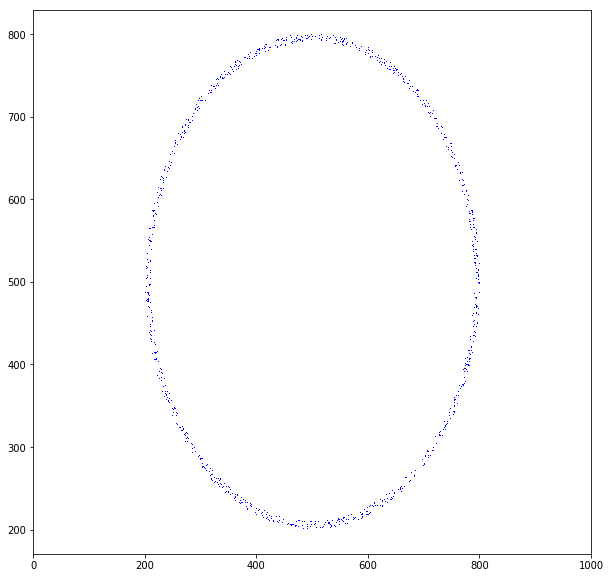

In [39]:
plt.plot(anilloX, anilloY, "b,")
plt.xlim(0, 1000);